In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 이미지 로드, YUV 컬러 스페이스 변경
img = cv2.imread('./img/bright.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

In [3]:
# 밝기 채널에 대해서 이퀄라이즈 적용
img_eq = img_yuv.copy()
img_eq[:, :, 0] = cv2.equalizeHist(img_eq[:, :, 0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

In [4]:
# 밝기 채널에 대해서 CLAHE 적용
img_clahe = img_yuv.copy()
# CLAHE 생성
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
# CLAHE 적용
img_clahe[:, :, 0] = clahe.apply(img_clahe[:, :, 0])
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

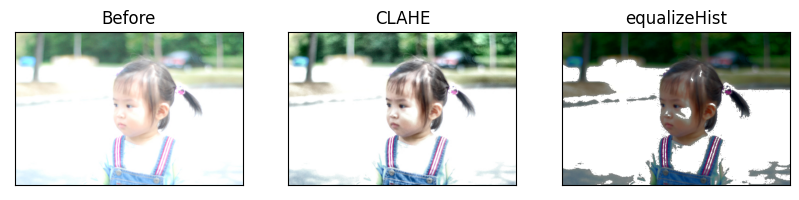

In [6]:
# 결과 출력
imgs = {'Before':img, 'CLAHE':img_clahe, 'equalizeHist':img_eq}
fig = plt.figure(figsize=(10, 5))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([])
    plt.yticks([])
plt.show()